# Sobre as Features
  * visitId é a identificação de um único usuário;
  * visitStartTime é quando ele começou a visita;
  * visitNumber é um número que indica se é a primeira visita (1) ou segunda visita (2), etc;
  * device é o tipo de dispositivo utilizado pelo visitorId para acessar o site;
  * channel é o canal que ele utilizou para acessar o site. (google por meio de pesquisa encontrando o site, por exemplo);
  * Duration  é o tempo que o visitorId ficou no site
  * Revenue é o quanto o visitorId gastou no site;

# Perguntas que posso fazer para obter insights
  * Quais dipositivos gastam mais? (tablet, celular, computador pessoal);
  * Quais canais de acesso tem o maiores gastos? (GoogleSearch, Facebook, email);
  * Quanto tempo, em média, leva um usuário até ele fazer uma compra?
  

# Informações
 * Cada linha da base de dados é uma sessão (uma visita que o usuário fez);
 * Logo, temos usuários <= sessões ;
 * Deve-se alterar o tipo da coluna "date" , fillVisitorId e "visitId"	que foram identificadas como int (inteiro) porque não conseguiremos quebrar esse numero gerados em ( ano, mes, dia) se ele estiver como inteiro e não string. Ex: 20160408 como int não deixa extrair 2016, 04 e 08. 
 * "fullVisitorId"  foi identificado como inteiro e isso é um problema porque as vezes um numero começa com zeros e o pyhon corta ele. Ex: 050 fica 50
 * visitStartTime é inteiro mesmo porque é um TIMESTAMP de quando o usuário começou a visita. TIMESTAMP é uma conversão de segundo para calcular datas.

# Importação das bibliotecas



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# alocando do dataframe em df
df  = pd.read_csv("train.csv")

In [ ]:
# olhando as 5 primeiras linhas de df
df.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9674781571160116268,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",9674781571160116268_1472804607,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472804607,1,1472804607
1,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8590648239310839049,"{""continent"": ""Europe"", ""subContinent"": ""Easte...",8590648239310839049_1472835928,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472835928,1,1472835928
2,Affiliates,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9772828344252850532,"{""continent"": ""Americas"", ""subContinent"": ""Sou...",9772828344252850532_1472856802,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""Data Share Promo"", ""source"": ""Pa...",1472856802,1,1472856802
3,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472879649,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472879649,2,1472879649
4,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472829671,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""5"", ""pageviews"": ""4"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472829671,1,1472829671


In [ ]:
# mostra (o número de linhas, o número de colunas)
df.shape

(12283, 12)

In [ ]:
df.fullVisitorId.values

array([9674781571160116268, 8590648239310839049, 9772828344252850532, ...,
       5437703324867866371, 8869363093179043393, 2905034275926274980],
      dtype=uint64)

In [ ]:
# Para saber o número de usuários ( valores únicos)
len(df.fullVisitorId.unique())


9996

In [ ]:
# mostra como o pandas identificou os objetos no dataframe
df.dtypes

channelGrouping         object
date                     int64
device                  object
fullVisitorId           uint64
geoNetwork              object
sessionId               object
socialEngagementType    object
totals                  object
trafficSource           object
visitId                  int64
visitNumber              int64
visitStartTime           int64
dtype: object

In [ ]:
# Como pode ter havido perda de dados na leitura pelo pandas ( perda de zeros nese caso),
# o ideal é fazer a leitura novamente e colocar o tipo de dado da coluna como argumento
# em dicionário

df = pd.read_csv("train.csv", dtype={"date":object,"fullVisitorId": object, "visitId":object})

In [ ]:
df.dtypes

channelGrouping         object
date                    object
device                  object
fullVisitorId           object
geoNetwork              object
sessionId               object
socialEngagementType    object
totals                  object
trafficSource           object
visitId                 object
visitNumber              int64
visitStartTime           int64
dtype: object

In [ ]:
## Vamos verificar o que a coluna "device" armazena ( já que é possível ver que existem informações)
## que não são mostradas

df.device[0]

# o resultado é um tipo de dado "chave:valor" ou json ou dicionário aqui no python
# Isso ocorre como uma forma de agregar valor/informações em uma categoria
# Para passar esses valores para o modelo, é necessário criar novas colunas para cada chave

'{"browser": "Chrome", "browserVersion": "not available in demo dataset", "browserSize": "not available in demo dataset", "operatingSystem": "Windows", "operatingSystemVersion": "not available in demo dataset", "isMobile": false, "mobileDeviceBranding": "not available in demo dataset", "mobileDeviceModel": "not available in demo dataset", "mobileInputSelector": "not available in demo dataset", "mobileDeviceInfo": "not available in demo dataset", "mobileDeviceMarketingName": "not available in demo dataset", "flashVersion": "not available in demo dataset", "language": "not available in demo dataset", "screenColors": "not available in demo dataset", "screenResolution": "not available in demo dataset", "deviceCategory": "desktop"}'

In [ ]:
# Como no python esse tipo de dado é lido como dicionário, para que seja possível transformas as chaves
# em colunas, é necessário converter esses valores em dicionário. A biblioteca que faz isso é json
import json


In [ ]:
## agora, vamos converter em dicionário
json.loads(df.device.iloc[0])

{'browser': 'Chrome',
 'browserSize': 'not available in demo dataset',
 'browserVersion': 'not available in demo dataset',
 'deviceCategory': 'desktop',
 'flashVersion': 'not available in demo dataset',
 'isMobile': False,
 'language': 'not available in demo dataset',
 'mobileDeviceBranding': 'not available in demo dataset',
 'mobileDeviceInfo': 'not available in demo dataset',
 'mobileDeviceMarketingName': 'not available in demo dataset',
 'mobileDeviceModel': 'not available in demo dataset',
 'mobileInputSelector': 'not available in demo dataset',
 'operatingSystem': 'Windows',
 'operatingSystemVersion': 'not available in demo dataset',
 'screenColors': 'not available in demo dataset',
 'screenResolution': 'not available in demo dataset'}

In [ ]:
# verifica se é dicionário
type(json.loads(df.device.iloc[0]))

dict

In [ ]:
## Agora é possível colocar as chaves como colunas
# Cria-se uma comprehension para ler linha-a-linha as colunas que são do tipo chave:valor
#exemplo
pd.DataFrame([json.loads(linha) for linha in df.device]) # aqui ja coloca em dataframe direto

#[output if condition else output for l in list]

NameError: ignored

In [ ]:
# No exemplo anterior, só fizemos para a coluna "device", mas identificamos que "geoNetwork",
# "totals" e "trafficSource" são do tipo chave:valor também
# Criamos um dicionário que armazena essas colunas para que possamos fazer um loop que 
# percorra esse dicionários, criando automaticamente todas as colunas de cada chave.
dicionarios = ["device","geoNetwork","totals","trafficSource"]

for coluna in dicionarios:
  df = df.join(pd.DataFrame([json.loads(linha) for linha in df[coluna]])) # junta as colunas de df com
  # as colunas transformadas por pd.DataFrame([json.loads(linha) for linha in df[coluna]])
  # df[coluna] identifica a coluna de df a ser localizada e transformada

In [ ]:
# verifica o novo formato
df.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime,browser,browserVersion,browserSize,operatingSystem,operatingSystemVersion,isMobile,mobileDeviceBranding,mobileDeviceModel,mobileInputSelector,mobileDeviceInfo,mobileDeviceMarketingName,flashVersion,language,screenColors,screenResolution,deviceCategory,continent,subContinent,country,region,metro,city,cityId,networkDomain,latitude,longitude,networkLocation,visits,hits,pageviews,bounces,newVisits,transactionRevenue,campaign,source,medium,keyword,adwordsClickInfo,isTrueDirect,referralPath,adContent,campaignCode
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9674781571160116268,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",9674781571160116268_1472804607,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472804607,1,1472804607,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Asia,Southeast Asia,Singapore,(not set),(not set),Singapore,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,NaN,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN
1,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8590648239310839049,"{""continent"": ""Europe"", ""subContinent"": ""Easte...",8590648239310839049_1472835928,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472835928,1,1472835928,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Europe,Eastern Europe,Poland,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,tpnet.pl,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,NaN,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN
2,Affiliates,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9772828344252850532,"{""continent"": ""Americas"", ""subContinent"": ""Sou...",9772828344252850532_1472856802,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""Data Share Promo"", ""source"": ""Pa...",1472856802,1,1472856802,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,South America,Argentina,Buenos Aires,(not set),Buenos Aires,not available in demo dataset,phonevision.com.ar,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,NaN,Data Share Promo,Partners,affiliate,NaN,{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN
3,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""n

In [ ]:
# verifica o novo numero de linhas e colunas
df.shape

(12283, 54)

In [ ]:
# As 4 colunas que foram transformadas ainda estão em df. Como ja retiramos todas as informações 
# presentes nelas, podemos retirá-las de df. A função que faz isso é .drop(o que vai ser retirados, linha = 0 ou 
# coluna = 1, inplace = True se vai retirar na propria df ou inplace = false se vai atribuir df em uma nova variavel)
df.drop(dicionarios, axis=1,inplace=True)

In [ ]:
# verifica o novo formato
df.head()


,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,browser,browserVersion,browserSize,operatingSystem,operatingSystemVersion,isMobile,mobileDeviceBranding,mobileDeviceModel,mobileInputSelector,mobileDeviceInfo,mobileDeviceMarketingName,flashVersion,language,screenColors,screenResolution,deviceCategory,continent,subContinent,country,region,metro,city,cityId,networkDomain,latitude,longitude,networkLocation,visits,hits,pageviews,bounces,newVisits,transactionRevenue,campaign,source,medium,keyword,adwordsClickInfo,isTrueDirect,referralPath,adContent,campaignCode
0,Organic Search,20160902,9674781571160116268,9674781571160116268_1472804607,Not Socially Engaged,1472804607,1,1472804607,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Asia,Southeast Asia,Singapore,(not set),(not set),Singapore,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,NaN,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN
1,Organic Search,20160902,8590648239310839049,8590648239310839049_1472835928,Not Socially Engaged,1472835928,1,1472835928,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Europe,Eastern Europe,Poland,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,tpnet.pl,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,NaN,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN
2,Affiliates,20160902,9772828344252850532,9772828344252850532_1472856802,Not Socially Engaged,1472856802,1,1472856802,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,South America,Argentina,Buenos Aires,(not set),Buenos Aires,not available in demo dataset,phonevision.com.ar,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,NaN,Data Share Promo,Partners,affiliate,NaN,{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN
3,Organic Search,20160902,1350700416054916432,1350700416054916432_1472879649,Not Socially Engaged,1472879649,2,1472879649,Safari,not available in demo dataset,not available in demo dataset,iOS,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcast.net,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,NaN,NaN,(not set),google,organic,(not provided),{'criteriaParamet

In [ ]:
# verifica o novo numero de linhas e colunas
df.shape

(12283, 50)

In [ ]:
len(df.channelGrouping.unique())

8

In [ ]:
df.drop("adwordsClickInfo", axis = 1, inplace=True)

In [ ]:
# coluna_na vai receber as colunas que tem valor 1 e depois vamos utilizá-la 
# em .drop()
coluna_na = []

In [ ]:
# o quão diferente são os dados de cada coluna?
for column in df.columns:
  print(column + ":" + str(len(df[column].unique())))
  if len(df[column].unique()) == 1:
    coluna_na.append(column)

channelGrouping:8
date:366
fullVisitorId:9997
sessionId:12276
socialEngagementType:1
visitId:12272
visitNumber:50
visitStartTime:12279
browser:22
browserVersion:1
browserSize:1
operatingSystem:12
operatingSystemVersion:1
isMobile:2
mobileDeviceBranding:1
mobileDeviceModel:1
mobileInputSelector:1
mobileDeviceInfo:1
mobileDeviceMarketingName:1
flashVersion:1
language:1
screenColors:1
screenResolution:1
deviceCategory:3
continent:6
subContinent:22
country:145
region:212
metro:53
city:296
cityId:1
networkDomain:1747
latitude:1
longitude:1
networkLocation:1
visits:1
hits:96
pageviews:75
bounces:2
newVisits:2
transactionRevenue:147
campaign:7
source:76
medium:7
keyword:129
isTrueDirect:2
referralPath:198
adContent:16
campaignCode:2



* Varias colunas tem valor 1, o que quer dizer que ela tem o mesmo  valor para todas as linhas, logo não hávariação que agregue no modelo. Devemos removelas.

In [ ]:
coluna_na

['socialEngagementType',
 'browserVersion',
 'browserSize',
 'operatingSystemVersion',
 'mobileDeviceBranding',
 'mobileDeviceModel',
 'mobileInputSelector',
 'mobileDeviceInfo',
 'mobileDeviceMarketingName',
 'flashVersion',
 'language',
 'screenColors',
 'screenResolution',
 'cityId',
 'latitude',
 'longitude',
 'networkLocation',
 'visits']

In [ ]:
# aqui a coluna "adwordsClickInfo" deu erro porque ela é dict
column

'campaignCode'

In [ ]:
#df["adwordsClickInfo"][0]
#{'criteriaParameters': 'not available in demo dataset'} não é importante, então dropamos ali em cima

In [ ]:
# dropando as colunas que têm apenas um valor
df.drop(coluna_na, axis=1, inplace=True)

In [ ]:
df.shape

(12283, 31)

# Feature Engeneering
 Criaremos 4 variáveis quantitativas para tentar contar a história do usuário, qual foi a jornada dele no período de análise.
 * 1ª newVisits: Número total de usuários na sessão (para conveniência). Na primeira visita esse valor é 1, nas demais é zero. Ela vai mostrar o volume de primeiras visitas ;
 * 2ª pageViews: Número total de paginas que o usuário visualizou depois de iniciar uma sessão (página carregada ou atualizada);
 * 3ª bounces (Rejeição - Não gera nenhuma interação para o google): Uma visita de apenas uma request para o google analytics. O usuário abre uma única pagina do seu website e, em seguida, sai sem acionar outras solicitações ao servidor do Google Analytics. 
 * 4ª hits: Volume de interação que o google recebeu do site (acompanhamento de página, acompanhamento de evento e comércio eletrônico)


In [ ]:
df.dtypes

channelGrouping       object
date                  object
fullVisitorId         object
sessionId             object
visitId               object
visitNumber            int64
visitStartTime         int64
browser               object
operatingSystem       object
isMobile                bool
deviceCategory        object
continent             object
subContinent          object
country               object
region                object
metro                 object
city                  object
networkDomain         object
hits                  object
pageviews             object
bounces               object
newVisits             object
transactionRevenue    object
campaign              object
source                object
medium                object
keyword               object
isTrueDirect          object
referralPath          object
adContent             object
campaignCode          object
dtype: object

In [ ]:
# Vamos transformar as variáveis quantivativas para tipo numérico.
# criaremos uma lista que armazena essas variáveis para que um loop faça uma varredura
# automática
quant = ["bounces", "hits","newVisits","pageviews", "transactionRevenue"]

In [ ]:
# Convertendo
for col in quant:
  df[col] = pd.to_numeric(df[col])
  #pd.to_numeric identifica qual tipo de dado fica melhor (float ou int)

In [ ]:
df.dtypes

channelGrouping        object
date                   object
fullVisitorId          object
sessionId              object
visitId                object
visitNumber             int64
visitStartTime          int64
browser                object
operatingSystem        object
isMobile                 bool
deviceCategory         object
continent              object
subContinent           object
country                object
region                 object
metro                  object
city                   object
networkDomain          object
hits                    int64
pageviews               int64
bounces               float64
newVisits             float64
transactionRevenue    float64
campaign               object
source                 object
medium                 object
keyword                object
isTrueDirect           object
referralPath           object
adContent              object
campaignCode           object
dtype: object

In [ ]:
df.head()

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,browser,operatingSystem,isMobile,deviceCategory,continent,subContinent,country,region,metro,city,networkDomain,hits,pageviews,bounces,newVisits,transactionRevenue,campaign,source,medium,keyword,isTrueDirect,referralPath,adContent,campaignCode
0,Organic Search,20160902,9674781571160116268,9674781571160116268_1472804607,1472804607,1,1472804607,Chrome,Windows,False,desktop,Asia,Southeast Asia,Singapore,(not set),(not set),Singapore,unknown.unknown,1,1,1.0,1.0,NaN,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN
1,Organic Search,20160902,8590648239310839049,8590648239310839049_1472835928,1472835928,1,1472835928,Chrome,Macintosh,False,desktop,Europe,Eastern Europe,Poland,not available in demo dataset,not available in demo dataset,not available in demo dataset,tpnet.pl,1,1,1.0,1.0,NaN,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN
2,Affiliates,20160902,9772828344252850532,9772828344252850532_1472856802,1472856802,1,1472856802,Chrome,Macintosh,False,desktop,Americas,South America,Argentina,Buenos Aires,(not set),Buenos Aires,phonevision.com.ar,1,1,1.0,1.0,NaN,Data Share Promo,Partners,affiliate,NaN,NaN,NaN,NaN,NaN
3,Organic Search,20160902,1350700416054916432,1350700416054916432_1472879649,1472879649,2,1472879649,Safari,iOS,True,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcast.net,1,1,1.0,NaN,NaN,(not set),google,organic,(not provided),True,NaN,NaN,NaN
4,Organic Search,20160902,1350700416054916432,1350700416054916432_1472829671,1472829671,1,1472829671,Safari,iOS,True,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,att.net,5,4,NaN,1.0,NaN,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN


# Tratando a variável resposta

In [ ]:
#Conta quanto de cada aparece
df.transactionRevenue.value_counts()

19190000.0     3
33590000.0     3
13590000.0     3
55990000.0     2
18990000.0     2
              ..
374850000.0    1
74850000.0     1
291070000.0    1
23960000.0     1
16780000.0     1
Name: transactionRevenue, Length: 146, dtype: int64

In [ ]:
# Conta quantos NaN tem na coluna
df.transactionRevenue.isna().sum()
# Tem 12119. Lembrando que o dataset tem 12283, a grande maioria não gastou no site. Logo NaN,
# são usuários que não gastaram, ou seja, zero.

12119

In [ ]:
## Substituindo os NaNs por zero
df.transactionRevenue.fillna(0, inplace=True)

In [ ]:
df.transactionRevenue

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
12278    0.0
12279    0.0
12280    0.0
12281    0.0
12282    0.0
Name: transactionRevenue, Length: 12283, dtype: float64

In [ ]:
#Conta quanto de cada aparece
df.transactionRevenue.value_counts()
# mostra o numero de quantos usuarios gastaram nada (12119)

0.0            12119
33590000.0         3
13590000.0         3
19190000.0         3
31490000.0         2
               ...  
374850000.0        1
74850000.0         1
291070000.0        1
23960000.0         1
372650000.0        1
Name: transactionRevenue, Length: 147, dtype: int64

* transactionRevenue é uma coluna no Google Analytics que tem o total multiplicado por 10e6

In [ ]:
# Trazendo "transactionRevenue" para o valor real
df.transactionRevenue = df.transactionRevenue/1e6

In [ ]:
df.transactionRevenue.value_counts()

0.00      12119
19.19         3
13.59         3
33.59         3
27.19         2
          ...  
253.77        1
239.88        1
88.05         1
112.05        1
26.49         1
Name: transactionRevenue, Length: 147, dtype: int64

In [ ]:
## Verificando o numero de usuários únicos
len(df.fullVisitorId.unique())
# 9997. Como temos 12283 sessões, alguns usuários visitaram interagiram com a pagina
# mais de uma vez. Nesse sentido, vamos agregar as informações repetidas de cada usuário.

9997

In [ ]:
# Agregando pela função de agregação .sum() e pela palavra chave "fullVisitorId".
# [quantitatives] filtra as ariaveis quantitativas que são utilizadas
df.groupby("fullVisitorId", as_index=False)[quant].sum()

#Como queremos o total por fullVisitorId, vamos utilizar a coluna fullVisitorId como chave do 
#groupby e posteriormente somar o total de quantitatives.

,fullVisitorId,bounces,hits,newVisits,pageviews,transactionRevenue
0,0002365800130207040,1.0,1,1.0,1,0.0
1,0010286039787739137,0.0,4,1.0,3,0.0
2,0011056874471185769,0.0,2,1.0,2,0.0
3,0014443856125569702,1.0,1,1.0,1,0.0
4,0017260116665815114,0.0,2,0.0,2,0.0
...,...,...,...,...,...,...
9992,9996691020299725061,0.0,10,0.0,10,0.0
9993,9996793353803109760,1.0,1,1.0,1,0.0
9994,9997125062030599880,0.0,8,1.0,8,0.0
9995,9997464307347866920,1.0,1,1.0,1,0.0


In [ ]:
df_quant = df.groupby("fullVisitorId", as_index=False)[quant].sum()

In [ ]:
df_quant.head() # novo dataframe com o resultado de cada usuário, cada jornada de usuário

,fullVisitorId,bounces,hits,newVisits,pageviews,transactionRevenue
0,0002365800130207040,1.0,1,1.0,1,0.0
1,0010286039787739137,0.0,4,1.0,3,0.0
2,0011056874471185769,0.0,2,1.0,2,0.0
3,0014443856125569702,1.0,1,1.0,1,0.0
4,0017260116665815114,0.0,2,0.0,2,0.0


In [ ]:
## Definindo as features e a variável target
x = df_quant.iloc[:,:-1]

In [ ]:
y = df_quant.iloc[:,-1]

In [ ]:
## Fazendo split dos dados separando em treino e teste
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.3, random_state = 42)

In [ ]:
## Treinando o model com .fit
from sklearn.linear_model import  LinearRegression
from  sklearn.metrics import r2_score, mean_squared_error

linreg = LinearRegression()
linreg.fit(xtrain, ytrain)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Predizendo valores futuros
ypred = linreg.predict(xtest)
ypred

array([1.55166047, 1.55520911, 1.68772647, ..., 1.61310964, 1.52678998,
       1.58119137])

In [ ]:
r2 = r2_score(ytest, ypred)
r2

-0.001162263338497782

In [ ]:
mse = mean_squared_error(ytest,ypred)
mse

807.2459296820928

## Análise Gráfica do resultado com Seaborn

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


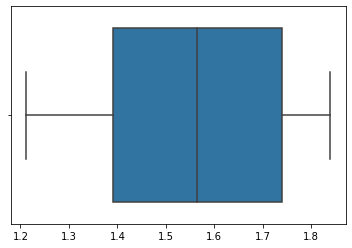

In [ ]:
## Analisando um boxplot para entender a distribuição da variável ypred
sns.boxplot(ypred)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


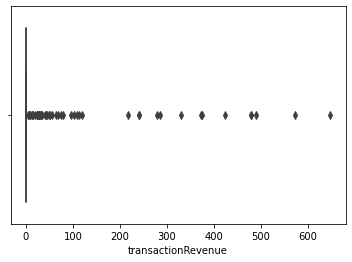

In [ ]:
## Analisando um boxplot para entender a distribuição da variável ytest
sns.boxplot(ytest)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


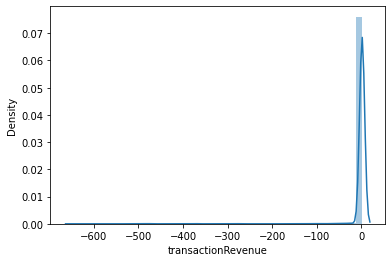

In [ ]:
## Analisando um histograma para entender a distribuição da variável ypred
sns.distplot(ypred-ytest)

# Melhorando o Feature Engeneering
  * Vamos analisar a primeira e a última visita de cada usuário, Isso será feito pela coluna "visitNumber"

In [ ]:
# Junta tudo pelo "fullVisitorId"
visitas_ultima = df.groupby("fullVisitorId", as_index=False)

In [ ]:
# Aqui, queremos o máximo valor da "visitNumber"
visitas_ultima["visitNumber"].max()

,fullVisitorId,visitNumber
0,0002365800130207040,1
1,0010286039787739137,1
2,0011056874471185769,1
3,0014443856125569702,1
4,0017260116665815114,6
...,...,...
9992,9996691020299725061,3
9993,9996793353803109760,1
9994,9997125062030599880,1
9995,9997464307347866920,1


In [ ]:
visitas_ultima = visitas_ultima["visitNumber"].max()

In [ ]:
visitas_ultima.head()

,fullVisitorId,visitNumber
0,0002365800130207040,1
1,0010286039787739137,1
2,0011056874471185769,1
3,0014443856125569702,1
4,0017260116665815114,6


# Melhorando o Feature Engeneering
   A nossa estratégia para cada usuário será a seguinte: mostrar as informações qualitativas da primeira e última sessão, e a soma dos valores quantitativos. Como primeiro passo, vamos criar um Dataframe com o fullVisitorId e com a última sessão que temos para aquele usuário no site.

In [ ]:
visitas_ultima = df.groupby('fullVisitorId',as_index=False)
visitas_ultima = visitas_ultima['visitNumber'].max()
visitas_ultima.head()

,fullVisitorId,visitNumber
0,0002365800130207040,1
1,0010286039787739137,1
2,0011056874471185769,1
3,0014443856125569702,1
4,0017260116665815114,6


Agora vamos salvar um DataFrame com os valores únicos entre usuário e visita.

In [ ]:
usuarios_visitas_unicos = df.drop_duplicates(subset=['fullVisitorId','visitNumber'])

Agora podemos recuperar para cada última sessão de usuário, os valores para aquela sessão.

In [ ]:
visitas = pd.merge(visitas_ultima,usuarios_visitas_unicos,left_on=['fullVisitorId','visitNumber'],
                  right_on=['fullVisitorId','visitNumber'],how='left')

vamos criar um DataFrame com o usuário e a sua primeira sessão no site:

In [ ]:
visitas_primeira = df.groupby('fullVisitorId',as_index=False)
visitas_primeira = visitas_primeira['visitNumber'].min()
visitas_primeira.set_index('fullVisitorId',inplace=True)

Agora vamos trazer todas as informações sobre a primeira visita para o dataframe “visitas”.

In [ ]:
visitas = visitas.join(visitas_primeira,how='left',on='fullVisitorId',rsuffix='_primeira')
visitas = pd.merge(visitas,usuarios_visitas_unicos,left_on=['fullVisitorId','visitNumber_primeira'],
                  right_on=['fullVisitorId','visitNumber'],how='left', suffixes=['_ultima','_primeira'])
visitas.head()

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,sessionId_ultima,visitId_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,subContinent_ultima,country_ultima,region_ultima,metro_ultima,city_ultima,networkDomain_ultima,hits_ultima,pageviews_ultima,bounces_ultima,newVisits_ultima,transactionRevenue_ultima,campaign_ultima,source_ultima,medium_ultima,keyword_ultima,isTrueDirect_ultima,referralPath_ultima,adContent_ultima,campaignCode_ultima,visitNumber_primeira,channelGrouping_primeira,date_primeira,sessionId_primeira,visitId_primeira,visitNumber_primeira,visitStartTime_primeira,browser_primeira,operatingSystem_primeira,isMobile_primeira,deviceCategory_primeira,continent_primeira,subContinent_primeira,country_primeira,region_primeira,metro_primeira,city_primeira,networkDomain_primeira,hits_primeira,pageviews_primeira,bounces_primeira,newVisits_primeira,transactionRevenue_primeira,campaign_primeira,source_primeira,medium_primeira,keyword_primeira,isTrueDirect_primeira,referralPath_primeira,adContent_primeira,campaignCode_primeira
0,0002365800130207040,1,Social,20160904,0002365800130207040_1472974804,1472974804,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,1,1,1.0,1.0,0.0,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,Social,20160904,0002365800130207040_1472974804,1472974804,1,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,1,1,1.0,1.0,0.0,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN
1,0010286039787739137,1,Organic Search,20160928,0010286039787739137_1475084026,1475084026,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),4,3,NaN,1.0,0.0,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,Organic Search,20160928,0010286039787739137_1475084026,1475084026,1,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),4,3,NaN,1.0,0.0,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN
2,0011056874471185769,1,Social,20161205,0011056874471185769_1480996024,1480996024,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,2,2,NaN,1.0,0.0,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,1,Social,20161205,0011056874471185769_1480996024,1480996024,1,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,2,2,NaN,1.0,0.0,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN
3,0014443856125569702,1,Social,20161002,0014443856125569702_1475423502,1475423502,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,1,1,1.0,1.0,0.0,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,Social,20161002,0014443856125569702_1475423502,1475423502,1,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,1,1,1.0,1.0,0.0,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN
4,0017260116665815114,6,Direct,20170420,0017260116665815114_1492707286,1492707286,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,2,2,NaN,NaN,0.0,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,6,Direct,20170420,0017260116665815114_1492707286,1492707286,6,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not a

Exclusão das colunas primeira e última referentes às variáveis quantitativas.

In [ ]:
for coluna in quant:
    visitas.drop(coluna + '_ultima',axis=1,inplace=True)
    visitas.drop(coluna + '_primeira',axis=1,inplace=True)

visitas

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,sessionId_ultima,visitId_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,subContinent_ultima,country_ultima,region_ultima,metro_ultima,city_ultima,networkDomain_ultima,campaign_ultima,source_ultima,medium_ultima,keyword_ultima,isTrueDirect_ultima,referralPath_ultima,adContent_ultima,campaignCode_ultima,visitNumber_primeira,channelGrouping_primeira,date_primeira,sessionId_primeira,visitId_primeira,visitNumber_primeira,visitStartTime_primeira,browser_primeira,operatingSystem_primeira,isMobile_primeira,deviceCategory_primeira,continent_primeira,subContinent_primeira,country_primeira,region_primeira,metro_primeira,city_primeira,networkDomain_primeira,campaign_primeira,source_primeira,medium_primeira,keyword_primeira,isTrueDirect_primeira,referralPath_primeira,adContent_primeira,campaignCode_primeira
0,0002365800130207040,1,Social,20160904,0002365800130207040_1472974804,1472974804,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,Social,20160904,0002365800130207040_1472974804,1472974804,1,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN
1,0010286039787739137,1,Organic Search,20160928,0010286039787739137_1475084026,1475084026,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,Organic Search,20160928,0010286039787739137_1475084026,1475084026,1,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN
2,0011056874471185769,1,Social,20161205,0011056874471185769_1480996024,1480996024,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,1,Social,20161205,0011056874471185769_1480996024,1480996024,1,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN
3,0014443856125569702,1,Social,20161002,0014443856125569702_1475423502,1475423502,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,Social,20161002,0014443856125569702_1475423502,1475423502,1,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN
4,0017260116665815114,6,Direct,20170420,0017260116665815114_1492707286,1492707286,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,6,Direct,20170420,0017260116665815114_1492707286,1492707286,6,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [ ]:
coluna

'transactionRevenue'

Exclusão das colunas de ids.

In [ ]:
ids = ['sessionId_ultima','visitId_ultima','sessionId_primeira', 'visitId_primeira']
visitas.drop(ids,axis=1,inplace=True)

Exclusão das variáveis geográficas.

In [ ]:
visitas.columns

Index(['fullVisitorId', 'visitNumber_ultima', 'channelGrouping_ultima',
       'date_ultima', 'visitStartTime_ultima', 'browser_ultima',
       'operatingSystem_ultima', 'isMobile_ultima', 'deviceCategory_ultima',
       'continent_ultima', 'subContinent_ultima', 'country_ultima',
       'region_ultima', 'metro_ultima', 'city_ultima', 'networkDomain_ultima',
       'campaign_ultima', 'source_ultima', 'medium_ultima', 'keyword_ultima',
       'isTrueDirect_ultima', 'referralPath_ultima', 'adContent_ultima',
       'campaignCode_ultima', 'visitNumber_primeira',
       'channelGrouping_primeira', 'date_primeira', 'visitNumber_primeira',
       'visitStartTime_primeira', 'browser_primeira',
       'operatingSystem_primeira', 'isMobile_primeira',
       'deviceCategory_primeira', 'continent_primeira',
       'subContinent_primeira', 'country_primeira', 'region_primeira',
       'metro_primeira', 'city_primeira', 'networkDomain_primeira',
       'campaign_primeira', 'source_primeira', 'mediu

In [ ]:
geo = ['continent_primeira','subContinent_primeira', 'country_primeira', 'region_primeira',
       'metro_primeira', 'city_primeira', 'networkDomain_primeira']

In [ ]:
visitas.drop(geo,axis=1,inplace=True)

Join das variáveis quantitativas ao dataframe visitas.

In [ ]:
visitas = pd.merge(visitas,df_quant,left_on=['fullVisitorId'],
                  right_on=['fullVisitorId'],how='left')

Criação da variável diferença de tempo entre primeira e última visita.

In [ ]:
visitas['tempo_dif'] = visitas.visitStartTime_ultima - visitas.visitStartTime_primeira
visits = df.groupby('fullVisitorId',as_index=False).count().visitNumber.values
visitas['visits'] = visits

Criação da variável total de visitas por usuário.

In [ ]:
visits = df.groupby('fullVisitorId',as_index=False).count().visitNumber.values
visitas['visits'] = visits

In [ ]:
#Criação de variável com informações sobre ano, mês e dia dos acessos.
visitas['ano_ultima'] = pd.to_numeric([data[0:4] for data in visitas.date_ultima])
visitas['mes_ultima'] = pd.to_numeric([data[4:6] for data in visitas.date_ultima])
visitas['dia_ultima'] = pd.to_numeric([data[6:8] for data in visitas.date_ultima])
visitas['ano_primeira'] = pd.to_numeric([data[0:4] for data in visitas.date_primeira])
visitas['mes_primeira'] = pd.to_numeric([data[4:6] for data in visitas.date_primeira])
visitas['dia_primeira'] = pd.to_numeric([data[6:8] for data in visitas.date_primeira])

In [ ]:
visitas.dtypes

fullVisitorId                object
visitNumber_ultima            int64
channelGrouping_ultima       object
date_ultima                  object
visitStartTime_ultima         int64
browser_ultima               object
operatingSystem_ultima       object
isMobile_ultima                bool
deviceCategory_ultima        object
continent_ultima             object
subContinent_ultima          object
country_ultima               object
region_ultima                object
metro_ultima                 object
city_ultima                  object
networkDomain_ultima         object
campaign_ultima              object
source_ultima                object
medium_ultima                object
keyword_ultima               object
isTrueDirect_ultima          object
referralPath_ultima          object
adContent_ultima             object
campaignCode_ultima          object
visitNumber_primeira          int64
channelGrouping_primeira     object
date_primeira                object
visitNumber_primeira        

In [ ]:
#Para treinar o nosso modelo, vamos remover o fullVisitorId da nossa base.
visitas.drop('fullVisitorId',axis=1,inplace=True)

In [ ]:
#Separar variáveis preditoras e variável resposta
y = visitas.transactionRevenue.copy()
X = visitas.drop('transactionRevenue',axis=1)

In [ ]:
#Tratamento das variáveis categóricas com LabelEncoder
quali = visitas.dtypes[visitas.dtypes == object].keys()
from sklearn.preprocessing import LabelEncoder

for coluna in quali:
    lbl = LabelEncoder()
    strings = list(X[coluna].values.astype('str'))
    lbl.fit(strings)
    X[coluna] = lbl.transform(strings)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
#Separação em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [ ]:
#Treinamento e predição de uma regressão linear
reg = LinearRegression()
reg.fit(X_train,y_train)
reg_predict = reg.predict(X_test)
#reg_predict apresentou valores negativos. Como uma compra não pode ser negativa
#inputamos zero
reg_predict[reg_predict < 0] = 0

In [ ]:
#Criação do dataframe para avaliação dos resultados
resultados = pd.DataFrame()
resultados['revenue'] = y_test
resultados['predict'] = reg_predict
resultados['erro'] = reg_predict - y_test
resultados.head()

,revenue,predict,erro
4122,0.0,0.096512,0.096512
4065,0.0,0.000000,0.000000
1731,0.0,0.000000,0.000000
4740,0.0,0.414826,0.414826
6391,0.0,0.000000,0.000000


In [ ]:
#Cálculo do RMSE
np.sqrt(mean_squared_error(y_test,reg_predict))

25.020044347471156

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


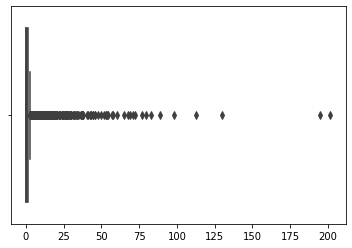

In [ ]:
#Boxplot das predições
sns.boxplot(reg_predict)

In [ ]:
#Treinamento do Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train,y_train)
gb_predict = gb.predict(X_test)
gb_predict[gb_predict < 0 ] = 0
gb_predict

array([0.03258195, 0.        , 0.        , ..., 0.33309813, 0.        ,
       0.        ])

In [ ]:
#Criação de um dataframe para avaliação dos resultados do Gradient Boosting
resultados = pd.DataFrame()
resultados['revenue'] = y_test
resultados['predict'] = gb_predict
resultados['erro'] = gb_predict - y_test
resultados.head()

,revenue,predict,erro
4122,0.0,0.032582,0.032582
4065,0.0,0.000000,0.000000
1731,0.0,0.000000,0.000000
4740,0.0,0.000000,0.000000
6391,0.0,0.000000,0.000000


In [ ]:
# Calcular o RMSE com Gradient Boosting
np.sqrt(mean_squared_error(y_test,gb_predict))

23.09413632899293